![ADSA Logo](http://i.imgur.com/BV0CdHZ.png?2 "ADSA Logo")

# Spring 2018 ADSA Workshop - Python Series: Advanced Machine Learning
> Workshop content by ADSA with some adaptations from: 
> http://scikit-learn.org/stable/user_guide.html 

## Overview

***
Welcome to the Advanced Machine Learning workshop. Today we will go over:
* Review of K Nearest Neighbor
* Decision Trees 
* Naive Bayes


To run any block of code, type `Ctrl + ENTER`. This will execute the code and tell you the errors encountered, if there were any.
***

## Review of K Nearest Neighbor

![knn Image from Wikipedia][knni]
[knni]: https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/500px-KnnClassification.svg.png

Let us start by importing our iris data set(https://en.wikipedia.org/wiki/Iris_flower_data_set)

In [1]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [2]:
print(iris_dataset.feature_names)
print(iris_dataset['data'][::50])
print(iris_dataset.target_names)
print(iris_dataset['target'][::50])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.3 3.3 6.  2.5]]
['setosa' 'versicolor' 'virginica']
[0 1 2]


Now import the train_test_split function, which will split our data into two subsets: training and testing data.

In [3]:
from sklearn.model_selection import train_test_split

### Split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)
#print(x_train)
#print(x_test)
#print(y_train)
print(y_test)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]


### Why do we need to split the data into training and testing data? 
In machine learning, we generalize patterns beyond the data used to train models. Because we do not know the target values, we can not check the accuracy of our predictions in the future. Therefore, we can use a portion of training data to test our model. 

In [10]:
from sklearn.neighbors import KNeighborsClassifier

### Create our classifier

In [11]:
knn = KNeighborsClassifier()

### Train with data

In [12]:
knn = knn.fit(x_train, y_train)

### Score

In [13]:
knn.score(x_test, y_test)

0.9736842105263158

### Predict

In [14]:
import numpy as np
X_new = np.array([[5, 2.9, 1, 0.2]])
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
       iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


## Decision Trees

Decision trees are one of the few models that allow users to interpret exactly why the classifier makes a decision. Under the hood, the decision tree classifer asks a series of yes or no questions. Based on the answers, the classifier will return its decision.

### Split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

### Create our classifier

In [16]:
from sklearn import tree

In [17]:
clf = tree.DecisionTreeClassifier()

### Train with data

In [18]:
clf = clf.fit(x_train, y_train)

### Score

In [19]:
clf.score(x_test, y_test)

0.9736842105263158

### Predict

In [24]:
X_new = np.array([[5, 2.9, 1, 1.0]])
prediction = clf.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
       iris_dataset['target_names'][prediction]))
print(iris_dataset.feature_names)

Prediction: [1]
Predicted target name: ['versicolor']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [38]:
import graphviz 
import pydotplus
from sklearn.externals.six import StringIO

dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=iris_dataset.feature_names,
                                class_names=iris_dataset.target_names,
                                filled=True, rounded=True,
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf('iris.pdf')

True

## Excercise: Wine dataset

In [58]:
from sklearn.datasets import load_wine

x = pd.DataFrame(load_wine())

ValueError: arrays must all be same length

In [59]:
wine_dataset = load_wine()
print(wine_dataset['data'][0])
print(wine_dataset.target_names)

[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
['class_0' 'class_1' 'class_2']


In [28]:
# split the data using the train_test_split. Set random_state to 0.
x_train, x_test, y_train, y_test = train_test_split(
    wine_dataset['data'], wine_dataset['target'], random_state=0)

In [29]:
# create the decision tree classifier
wine_clf = tree.DecisionTreeClassifier()

In [46]:
# predict the class of a wine_new
wine_new = np.array([[1.6, 5.1, 3.1, 2.20, 8.8, 1.5, 0.047, 0.052, 1.15, 6.62, 0.07, 1.75,52.0]])
prediction = wine_clf.predict(wine_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
       wine_dataset['target_names'][prediction]))

Prediction: [2]
Predicted target name: ['class_2']
{'alcohol': array([1.60e+00, 5.10e+00, 3.10e+00, 2.20e+00, 8.80e+00, 1.50e+00,
       4.70e-02, 5.20e-02, 1.15e+00, 6.62e+00, 7.00e-02, 1.75e+00,
       5.20e+01])}


In [36]:
# get the score of the decision tree model
wine_clf.score(x_test,y_test)

0.9555555555555556

In [39]:
dot_data = tree.export_graphviz(wine_clf, out_file=None,
                                feature_names=wine_dataset.feature_names,
                                class_names=wine_dataset.target_names,
                                filled=True, rounded=True,
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf('wine.pdf')

True

## [Naive Bayes][nb] 

The first algorithm we will explore is one of the simplest, the [Naive
Bayes][nb] algorithm. Fundamentally, this algorithm is remarkably simple
and is based on the assumption of independence that a given attribute (or
feature) belongs to a specific class. Scikit learn provides several
Naive Bayes implementations, using a specific one generally depends on
the nature of the data being analyzed:

- [Gaussian Naive Bayes][gnb] 
- [Multinomial Naive Bayes][mnb] 
- [Bernoulli Naive Bayes][bnb] 

In the following code cells, we demonstrate how to perform Naive Bayes
classification by using scikit learn, in this case we use the Gaussian
Naive Bayes implementation. The standard classification process in
scikit learn is to first fit a model to the training data and to
subsequently apply this model to predict values for the testing data.
After this process, we first compute the prediction score before
displaying the confusion matrix for this algorithm.

-----
[gnb]: http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB
[mnb]: http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB
[bnb]: http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB
[nb]: https://en.wikipedia.org/wiki/Naive_Bayes_classifier

In [47]:
# Set up Notebook
% matplotlib inline

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We do this to ignore several specific Pandas warnings
import warnings

## Handwritten Digits

We will explore the Naive Bayes
classification applied to handwritten digits. First we will load the
data and review some of the sample. After which, we will apply a
Multinomial Naive Bayes classification to this data and explore the
resulting predictions.

-----

Total number of samples = 1797


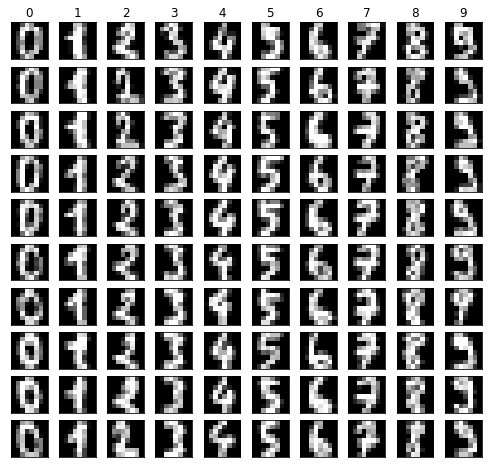

In [48]:
# We have helper code to assist in the loading and plotting of these data
import digits as hd

# We extract features (x), labels (y), and the images for plotting.
x, y, images = hd.get_data()
hd.im_plot(x, y, images)

print('Total number of samples = {0}'.format(x.shape[0]))

-----

### Classification of Image Data

Now that these data are loaded, we can apply a Naives Bayes classifier
to this problem. Below we employ a Multinomial Naive Bayes model, and
show the classification score, and the classification report.

-----

In [49]:
import sklearn.cross_validation as cv
(x_train, x_test, y_train, y_test) = cv.train_test_split(x, y, test_size=.25)

# First, lets try Gaussain NB
from sklearn.naive_bayes import MultinomialNB

# First we construct our Classification Model
nbc = MultinomialNB()

nbc.fit(x_train, y_train);

print('Prediction Accuracy = {0:3.1f}%'.format(100*nbc.score(x_test, y_test)))

Prediction Accuracy = 90.4%


/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [50]:
print(x_train)

[[ 0.  0.  0. ...  6.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  8. ...  1.  0.  0.]
 ...
 [ 0.  0. 11. ...  0.  0.  0.]
 [ 0.  0.  3. ...  0.  0.  0.]
 [ 0.  0.  4. ...  0.  0.  0.]]


In [51]:
# more information on the precision, recall, f1-score, and support is found here: 
# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html

from sklearn.metrics import classification_report

y_pred = nbc.predict(x_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      0.95      0.97        40
          1       0.91      0.77      0.84        53
          2       0.91      0.90      0.91        48
          3       0.98      0.90      0.94        50
          4       0.90      0.93      0.91        46
          5       0.97      0.80      0.88        44
          6       0.98      0.98      0.98        41
          7       0.90      1.00      0.95        37
          8       0.87      0.94      0.90        49
          9       0.71      0.93      0.80        42

avg / total       0.91      0.90      0.91       450



-----

### Model Evaluation

The Naive Bayes model performed in a reasonable manner, but what about
on completely blind data. We can test the model by _making_ new data.
Below we use methods in the helper code to make _fake_ data, in this
case images of **one** and **seven**. We display the _fake_ images, and
then the results of our model classifying these new data.

-----

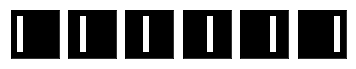

In [52]:
ones = hd.make_ones()
hd.plot_numbers(ones)

In [53]:
print('Actual : Predicted')
for one in ones:
    print('  1    :     {0}'.format(nbc.predict([one])[0])) # You can use "one" instead of "[one]"
                                                            # But it's depreciated in newer versions of sklearn

Actual : Predicted
  1    :     0
  1    :     0
  1    :     1
  1    :     1
  1    :     9
  1    :     9


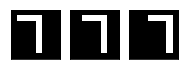

In [54]:
# Now test on our sevens
sevens = hd.make_sevens()
hd.plot_numbers(sevens)

In [55]:
print('Actual : Predicted')
for seven in sevens:
    print('  7    :     {0}'.format(nbc.predict([seven])[0]))

Actual : Predicted
  7    :     2
  7    :     9
  7    :     9
